# Exercise 38: Logistic Regression - Multi Class Classifier

In [1]:
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.linear_model import LogisticRegression

Load the MNIST data into memory

In [2]:
with gzip.open('train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))

with gzip.open('t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

Visualise a sample of the data

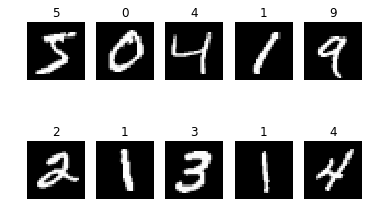

In [3]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i], cmap='gray');
    plt.title(f'{labels[i]}');
    plt.axis('off')

## Construct a Logistic Model to Classify Digits 0  - 9

In this model as we are predicting classes 0 - 9 we will require images from all available data.  However given the extremely large dataset we will need to sample only a small amount of the original MNIST set due to limited system requirements and anticipated training time.  We will select 2000 samples at random:

In [4]:
np.random.seed(0) # Give consistent random numbers
selection = np.random.choice(len(img), 5000)
selected_images = img[selection]
selected_labels = labels[selection]

In order to provide the image information to the Logistic model we must first flatten the data out so that each image is 1 x 784 pixels in shape.

In [5]:
selected_images = selected_images.reshape((-1, rows * cols))
selected_images.shape

(5000, 784)

Try applying normalisation by uncommenting the lines the next cell.  **What effect does it have on performance?**

In [6]:
#selected_images = selected_images / 255.0
#img_test = img_test / 255.0

Let's construct the model, use the sklearn LogisticRegression API and call the fit function.

In [7]:
model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=500, tol=0.1)
model.fit(X=selected_images, y=selected_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.1, verbose=0, warm_start=False)

Determine the score against the training set

In [8]:
model.score(X=selected_images, y=selected_labels)

1.0

Display the first two predictions for the Logistic model against the training data

In [9]:
model.predict(selected_images)[:2]

array([4, 1], dtype=uint8)

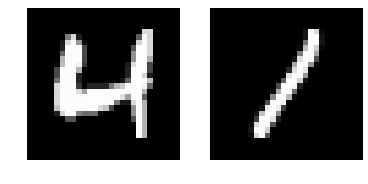

In [10]:
plt.subplot(1, 2, 1)
plt.imshow(selected_images[0].reshape((28, 28)), cmap='gray');
plt.axis('off');
plt.subplot(1, 2, 2)
plt.imshow(selected_images[1].reshape((28, 28)), cmap='gray');
plt.axis('off');

Examine the corresponding predicted probabilities for the first two training samples

In [11]:
model.predict_proba(selected_images)[0]

array([2.96442210e-43, 1.48526160e-86, 6.42369611e-35, 4.47099135e-69,
       1.00000000e+00, 4.86942544e-54, 4.59375153e-37, 2.07618567e-50,
       5.98339087e-32, 1.31118343e-38])

Compare the performance against the test set

In [12]:
model.score(X=img_test.reshape((-1, rows * cols)), y=labels_test)

0.878